## Netflix Original Films & IMDB Scores

The Dataset consists of Netflix Original films released as of July 1, 2021. The dataset has been taken from kaggle, we will do analysis about the popularity of films w.r.t to language, release dates, movietime lengths. The data will initially go through the process of cleaning before preparing it for analysis. Various visualization tools will used to properly understand the depth of analysis with the help of bar charts and scatter plots.  

You can find the dataset here: https://www.kaggle.com/luiscorter/netflix-original-films-imdb-scores

### Loading the Datset



In [2]:
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
netflix_df = pd.read_csv('Netflix.csv')

In [5]:
netflix_df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


We can see that the original dataset contains 584 rows and 6 columns. In columns 'Language' and 'Genre', there maybe multiple choices separated by slashes.

In [6]:
netflix_df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


Runtime and IMDB Scores statistics.


In [7]:
netflix_df.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

The name of all columns above, where we can see that they of type 'object'. For convenienve we may convert few of them into type 'int'.

In [8]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [9]:
netflix_df['Language'].value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
English/Spanish                 5
Turkish                         5
Marathi                         3
Polish                          3
Dutch                           3
English/Japanese                2
English/Hindi                   2
English/Mandarin                2
Filipino                        2
Thai                            2
English/Arabic                  1
Khmer/English/French            1
English/Akan                    1
Thia/English                    1
Spanish/Basque                  1
English/Ukranian/Russian        1
Tamil                           1
English/Taiwanese/Mandarin      1
English/Swedish                 1
Spanish/Catala

## Data Preparation and Cleaning

It is clear the Language column may contain multiple languages for a particular row. So we will drop all such rows. Further for simplification we will make new columns for simple naming of month and year. Then we will analyse each column and relation between columns.

In [10]:
netflix_df[netflix_df.Language.str.contains('/')]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
30,After Maria,Documentary,"May 24, 2019",37,4.6,English/Spanish
126,Bomb Scared,Black comedy,"October 12, 2017",89,5.6,Spanish/Basque
263,A Tale of Two Kitchens,Documentary,"May 22, 2019",30,6.3,English/Spanish
287,The Outsider,Crime drama,"March 9, 2018",120,6.3,English/Japanese
295,Birders,Documentary,"September 25, 2019",37,6.4,English/Spanish
316,Two Catalonias,Documentary,"September 28, 2018",116,6.4,Spanish/Catalan
320,A 3 Minute Hug,Documentary,"October 28, 2019",28,6.5,English/Spanish
334,Life Overtakes Me,Documentary,"June 14, 2019",40,6.5,English/Swedish
343,Tigertail,Drama,"April 10, 2020",91,6.5,English/Taiwanese/Mandarin


In [11]:
netflix_copy = netflix_df.copy(deep=True)
netflix_df.drop(netflix_df[netflix_df.Language.str.contains('/')].index,inplace=True)

To make the original dataset intact, we have created a copy of the orginal dataset. As the drop functions deletes the rows from the dataset.

In [12]:
netflix_df['Language'].value_counts()

English       401
Hindi          33
Spanish        31
French         20
Italian        14
Portuguese     12
Indonesian      9
Japanese        6
Korean          6
Turkish         5
German          5
Dutch           3
Marathi         3
Polish          3
Thai            2
Filipino        2
Georgian        1
Norwegian       1
Malay           1
Swedish         1
Bengali         1
Tamil           1
Name: Language, dtype: int64

In [13]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 1 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       561 non-null    object 
 1   Genre       561 non-null    object 
 2   Premiere    561 non-null    object 
 3   Runtime     561 non-null    int64  
 4   IMDB Score  561 non-null    float64
 5   Language    561 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 30.7+ KB


In [14]:
netflix_df=netflix_df.reset_index(drop=True)

## Exploratory Analysis and Visualization

Below visualizations for analysis has been done by making countplots for Runtime, Language, and Year. For the analysis of Year, I have created a new column from the 'Premiere' column. Finally, a scatter plot has been created to see the relation between IMDB Score, Language and Year.

#### Runtime Countplot

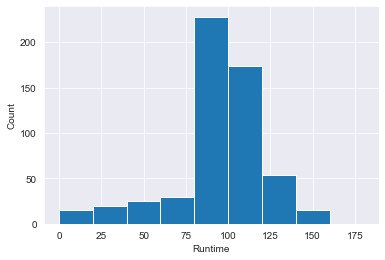

In [15]:
sns.set_style("darkgrid")
plt.xlabel('Runtime')
plt.ylabel('Count')
plt.hist(netflix_df.Runtime, bins=np.arange(0, 200, 20));

We can see above, that the maximum runtimes are between 75-100 range and then between 100-125 range.

#### Language Countplot

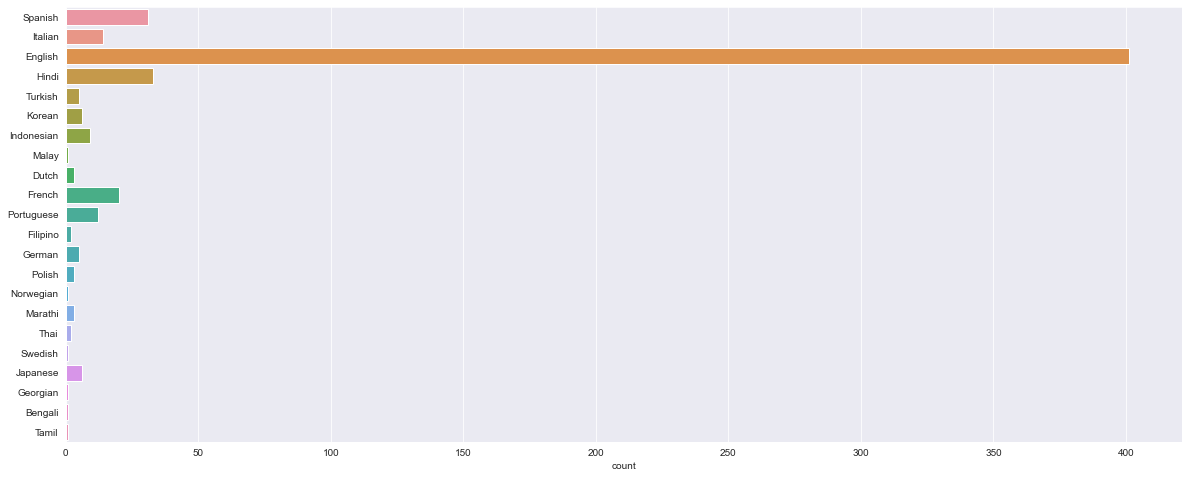

In [16]:
plt.figure(figsize=(20,8))
sns.countplot(y=netflix_df.Language)
plt.ylabel(None);

The Count of Language is highly skewed towards English. After that we have signification numbers for Hindi, Spanish, French and so on

#### Genre Analysis

In [17]:
netflix_df.Genre.value_counts().head(10)

Documentary        142
Drama               75
Comedy              49
Romantic comedy     39
Thriller            33
Comedy-drama        14
Crime drama         10
Horror               9
Biopic               9
Action               7
Name: Genre, dtype: int64

Documentary, Drama and Comedy are the top three. Other genres upto top 7 have a significant number of viewers.

#### Release Year Countplot

In [18]:
from datetime import datetime
strDate="September 28, 2018"
date_f=datetime.strptime(strDate, '%B %d, %Y')
print(date_f.strftime("%b %d %Y"))
netflix_df['Year'] = 1993

Sep 28 2018


In [19]:
for i in range(0,len(netflix_df)):
    netflix_df['Year'][i]=int(netflix_df['Premiere'][i][-4:])

<ipython-input-19-a81170111bf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['Year'][i]=int(netflix_df['Premiere'][i][-4:])


We have created a new column 'Year' to show the particulars years of the movie release date.

<AxesSubplot:xlabel='count', ylabel='Year'>

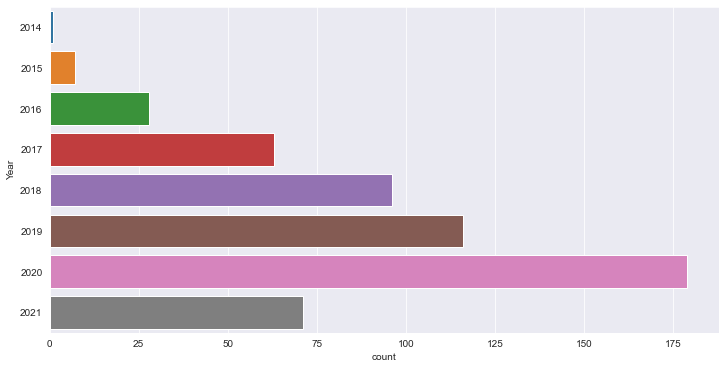

In [20]:
plt.figure(figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Movies')

sns.countplot(y=netflix_df.Year)

#### Relations between IMDB Score, Language and year.

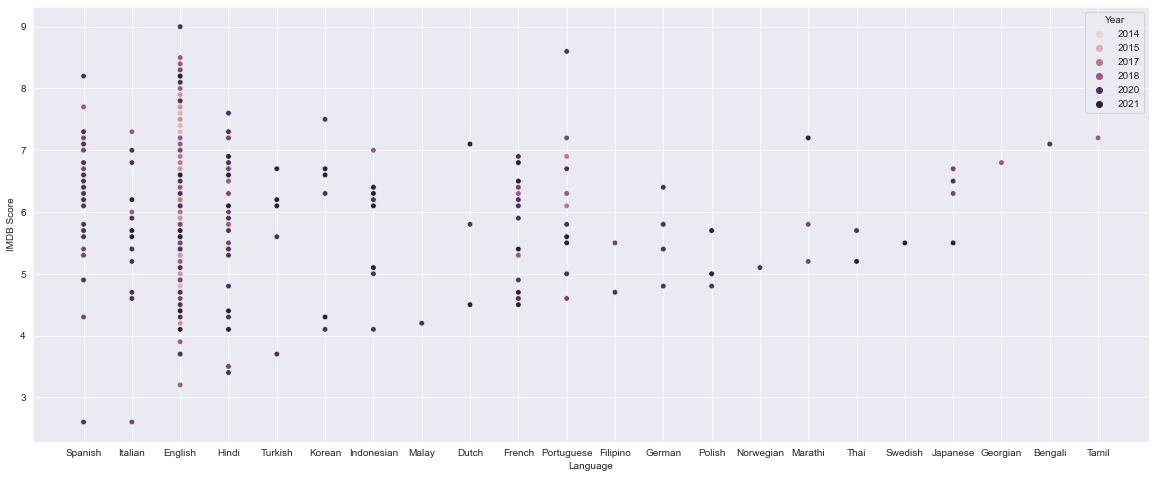

In [21]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=netflix_df['Language'], y=netflix_df['IMDB Score'],hue=netflix_df['Year'], s=30);

We can clearly visualize the relations of the IMDB Score, Language and year. Most of the movies lies in the middle spectrum between score range from 5 to 7. English movies have a large range of scores from about 3 to 9.

### Asking and Answering Questions

We have several insights from the above analysis. Now we will answer some few questions.

#### Q1: In which particular month was the highest number of movies released?

We will make another column that will represent take first three letter from the column the represent the month, and also take the particular year.

In [26]:
netflix_df['Month + Year'] = 1993
for i in range(0,len(netflix_df)):
    netflix_df['Month + Year'][i]=netflix_df['Premiere'][i][:3] + ' ' + netflix_df['Premiere'][i][-4:]

<ipython-input-26-184533c05f7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['Month + Year'][i]=netflix_df['Premiere'][i][:3] + ' ' + netflix_df['Premiere'][i][-4:]
/Users/Wasim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [28]:
netflix_df.head

<bound method NDFrame.head of                                           Title                  Genre  \
0                                   Dark Forces               Thriller   
1                                       The App  Science fiction/Drama   
2                                The Open House        Horror thriller   
3                                   Kaali Khuhi                Mystery   
4                                         Drive                 Action   
..                                          ...                    ...   
556  Ben Platt: Live from Radio City Music Hall           Concert Film   
557       Taylor Swift: Reputation Stadium Tour           Concert Film   
558                     Springsteen on Broadway           One-man show   
559   Emicida: AmarElo - It's All For Yesterday            Documentary   
560    David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score    Language  Year Month + Year  
0   

So a 'Month + year' column has been created.

In [29]:
netflix_df['Month + Year'].value_counts()[[0,1,2]]

Oct 2020    30
Dec 2020    20
Nov 2020    20
Name: Month + Year, dtype: int64

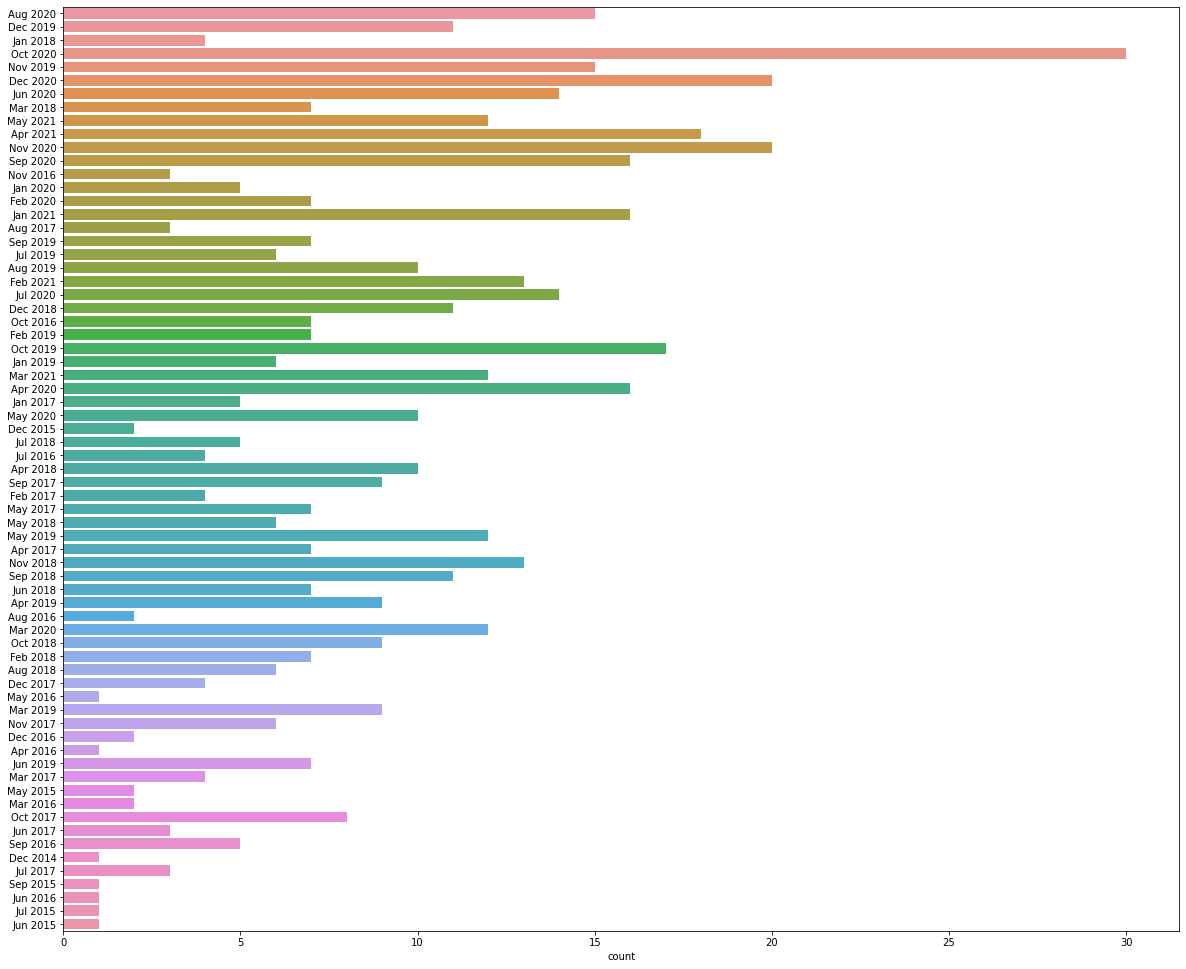

In [24]:
plt.figure(figsize=(20,17))
sns.countplot(y=netflix_df['Month + Year'])
plt.ylabel(None);

So, we can see from the countplot that the highest number of movies was released in October, 2020, that is 30 movies followed by December, 2020 and November 2020 with equal number of 20 movies.

#### Q2. Which Language movies are generally popular(>7 IMDB Score) other than 'English'?

In [33]:
pd.to_numeric(netflix_df['IMDB Score'])

0      2.6
1      2.6
2      3.2
3      3.4
4      3.5
      ... 
556    8.4
557    8.4
558    8.5
559    8.6
560    9.0
Name: IMDB Score, Length: 561, dtype: float64

For better representation, IMDB Score column has been converted to 'float' datatype. Next, we will created a new variable for dataframe after dropping all the rows with Language 'English'

In [35]:
netflix_neng=netflix_df.copy(deep=True)
netflix_neng.drop(netflix_neng[netflix_neng.Language.str.contains('English')].index,inplace=True)

In [27]:
netflix_neng[netflix_neng['IMDB Score']>7].Language.value_counts()

Spanish       7
Hindi         5
Portuguese    2
Italian       1
Korean        1
Marathi       1
Tamil         1
Bengali       1
Dutch         1
Name: Language, dtype: int64

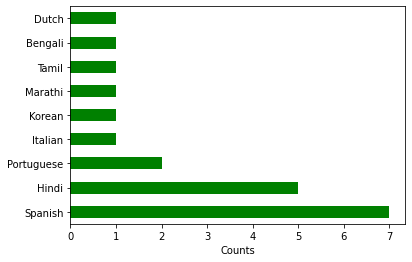

In [28]:
(netflix_neng[netflix_neng['IMDB Score']>7].Language.value_counts(ascending=False)).plot(kind='barh', color='g')

plt.xlabel('Counts');

From the above analysis, we can see that Spanish language movie are popular (IMDB SCore>7) followed by Hindi movies.

#### Q3. Which Genre is popular(>7 IMDB Score) among English and Non-English movies?

In [29]:
netflix_neng[netflix_neng['IMDB Score']>7].Genre.value_counts()

Documentary                   7
Drama                         5
Crime drama                   3
Anthology/Dark comedy         1
Making-of                     1
Coming-of-age comedy-drama    1
Romantic comedy               1
Thriller                      1
Name: Genre, dtype: int64

In Non-english segment, Documentary is most popular followed by Drama and Crime-Drama.

In [30]:
netflix_eng = netflix_df[netflix_df.Language=='English']

In [31]:
netflix_eng[netflix_eng['IMDB Score']>7].Genre.value_counts()

Documentary                             63
Drama                                    8
Concert Film                             5
Animation                                3
Animation / Short                        2
Crime drama                              2
Aftershow / Interview                    2
One-man show                             2
Mentalism special                        1
Western                                  1
War                                      1
Animation/Christmas/Comedy/Adventure     1
Comedy                                   1
Variety show                             1
Psychological thriller                   1
Making-of                                1
Musical / Short                          1
Historical drama                         1
Drama-Comedy                             1
Romantic comedy                          1
Comedy-drama                             1
Biopic                                   1
Animation / Science Fiction              1
Name: Genre

For English Movies, the popularity is skewed towards the documentary genre which is unusually high as compared to the other genre, while in the case of non english movies, the difference in popularity among different genres is not much. 

#### Q4. What is trend ( Genre and movie lengths) of the movies in the current times? 

We will do the analysis for the year '2021'

<AxesSubplot:>

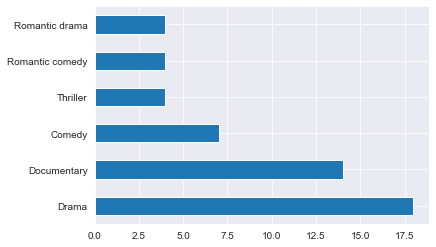

In [37]:
netflix_df[netflix_df['Year']==2021].Genre.value_counts()[:6].plot(kind='barh')

For this year, the number of movies released is greatest for Drama Genre. Below, are the runtime and IMDB Score analysis for the Drama Movies.

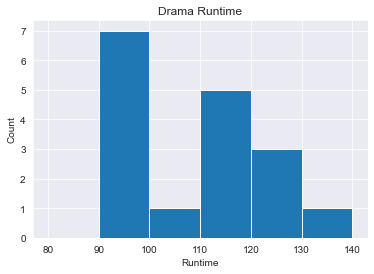

In [43]:
n1= netflix_df[netflix_df['Year']==2021]
plt.title('Drama Runtime')
plt.xlabel('Runtime')
plt.ylabel('Count')

plt.hist(n1[n1.Genre=='Drama'].Runtime, bins=np.arange(80, 150, 10));

Most of these movies have length 90-100 or 110-120.

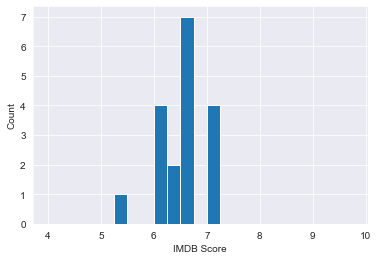

In [44]:
n2=n1[n1.Genre=='Drama']
plt.xlabel('IMDB Score')
plt.ylabel('Count')
plt.hist(n2['IMDB Score'], bins=np.arange(4, 10, 0.25));

Except one, all the drama movies of them have score between 6 and 7.